<a href="https://colab.research.google.com/github/FredArgoX/ChaoticTest_DataX/blob/main/ChaoticTest_PolyRegres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Polynomial Regression [Iteration 01]

In [ ]:
# Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
# Define feature (X) and target(y)
X = 6 * np.random.rand(200, 1) - 3
y = (0.8 * X**2) + (0.9 * X) + 2 + np.random.randn(200,1)

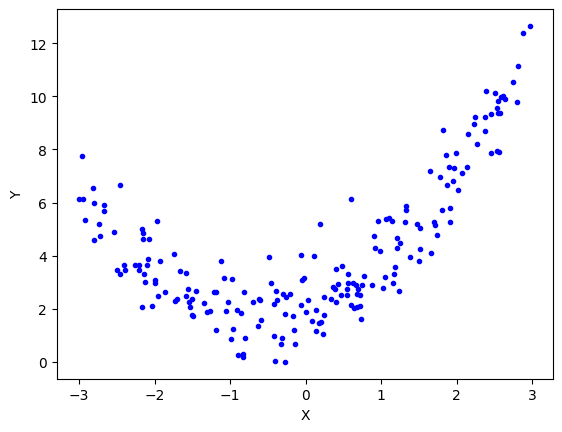

In [ ]:
# Visualize y(X)
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Simple linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.25717533446838203


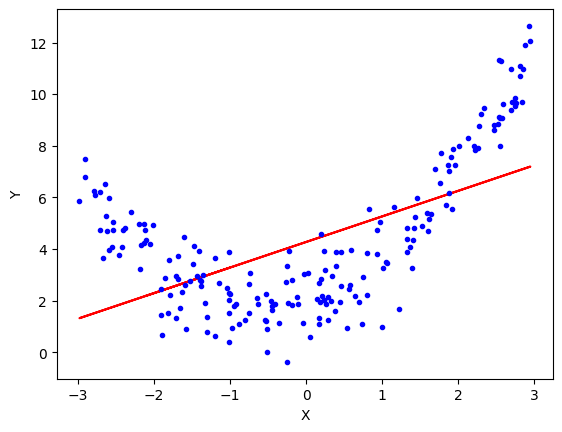

In [ ]:
# Visualize Linear regression
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# As Linear regression is not a fit, let's try Polynomial Regression

# Applying polynomial regression
# Degree chosen: 2
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply lienar regression to transformed X
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_pred = lr.predict(X_test_poly)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.8675441943599023


In [ ]:
lr.coef_

array([[0.        , 0.88139535, 0.80295669]])

In [ ]:
lr.intercept_

array([2.01238026])

$\hat{y} \approx 2.012 + 0.881X + 0.803X^2$

<ipython-input-27-8fe56a36101d>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  equation_plot_points.append(float(y))


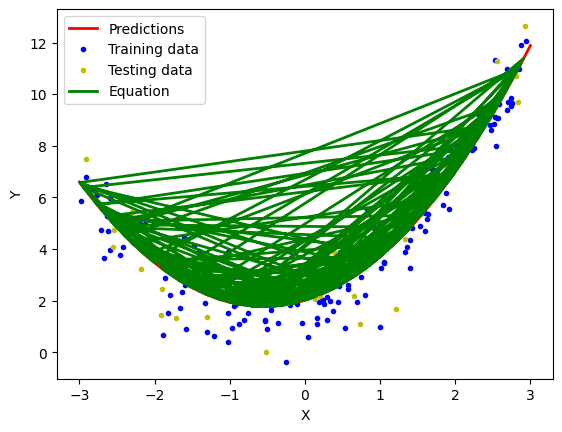

In [ ]:
# NOT OK
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Visualize polynomial regression
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

# ------------------------------------------------------------
#y_equation = 2.012 + 0.881*X_new + 0.803*X_new**2
#y_equation = (lr.intercept_[0] + (lr.coef_[0][1]*X) + (lr.coef_[0][2]*X**2))
equation_plot_points = []
for x_point in X:
  y = lr.intercept_[0] + (lr.coef_[0][1]*x_point) + (lr.coef_[0][2]*x_point**2)
  equation_plot_points.append(float(y))
# ------------------------------------------------------------

plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train, y_train, 'b.', label='Training data')
plt.plot(X_test, y_test, 'y.', label='Testing data')

plt.plot(X, equation_plot_points, 'g-', linewidth=2, label='Equation')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
# YES
X_list = []
for x in X:
  X_list.append(x[0])

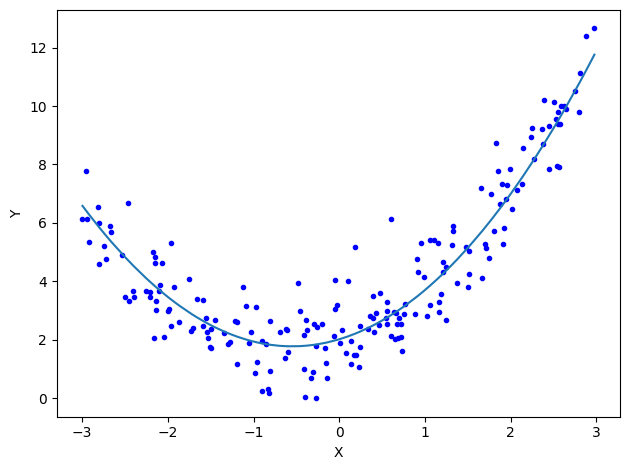

In [ ]:
plt.plot(X_list, y, 'b.')




#y_equation = 2.012 + 0.881*X_new + 0.803*X_new**2
#y_equation = (lr.intercept_[0] + (lr.coef_[0][1]*X) + (lr.coef_[0][2]*X**2))
equation_plot_points = []
for x_point in X_list:
  yp = float(lr.intercept_[0]) + (float(lr.coef_[0][1])*x_point) + (float(lr.coef_[0][2])*x_point**2)
  equation_plot_points.append(float(yp))

equation_plot_points

#plt.plot(X, equation_plot_points, 'g.')
data = pd.DataFrame({'X': X_list, 'equation_plot_points': equation_plot_points})
sns.lineplot(x=X_list, y=equation_plot_points, data=data)




plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

# Univariate Polynomial Regression [Iteration 02]

In [ ]:
# Create a data disctionary
data = {
    'target': [-1,3,2.5,5,4,2,5,4,6,7,6,7,8,7,6,5,4],
    'variable01': [-1,0,1,2,3,5,7,9,10,11,12,13,14,15,16,17,18],
    'variable02': [-1,0,1,2,3,5,7,-9,10,-11,-12,-13,14,15,-16,17,18],
}

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Create a pandas dataframe
df = pd.DataFrame(data, columns=['target', 'variable01'])

In [ ]:
# Separate target and feature
x = df[['variable01']]
y = df[['target']]

In [ ]:
model = sm.OLS(y, x).fit()
ypred = model.predict(x)

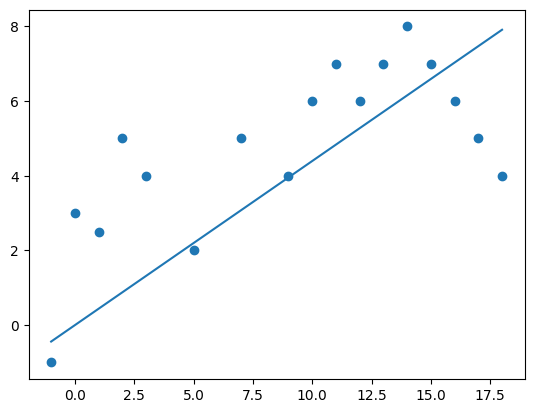

In [ ]:
plt.scatter(x, y)
plt.plot(x, ypred)

In [ ]:
pf2 = PolynomialFeatures(degree=2)
x2 = pf2.fit_transform(x)
x2.shape

(17, 3)

In [ ]:
x

,variable01
0,-1
1,0
2,1
3,2
4,3
5,5
6,7
7,9
8,10
9,11


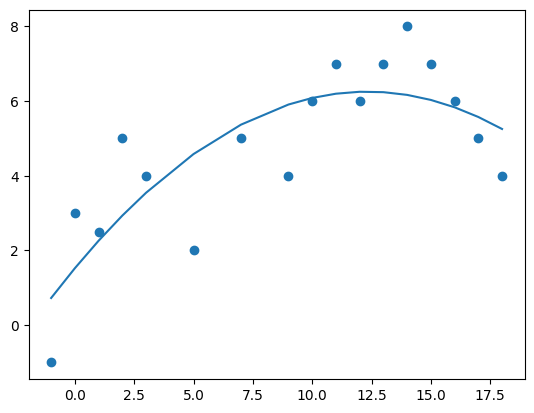

In [ ]:
model2 = sm.OLS(y, x2).fit()
ypred = model2.predict(x2)
plt.scatter(x,y)
plt.plot(x, ypred)

In [ ]:
model2 = sm.OLS(y, x2).fit()
ypred = model2.predict(x2)
plt.scatter(x,y)
plt.plot(x, ypred)

# Univariate Polynomial Regression [Iteration 03]

In [111]:
# Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [112]:
# Create a data disctionary
data = {
    'target': [-1,3,2.5,5,4,2,5,4,6,7,6,7,8,7,6,5,4],
    'variable01': [-1,0,1,2,3,5,7,9,10,11,12,13,14,15,16,17,18],
    'variable02': [-1,0,1,2,3,5,7,-9,10,-11,-12,-13,14,15,-16,17,18],
}

In [113]:
# Create a pandas dataframe
df = pd.DataFrame(data, columns=['target', 'variable01'])

In [114]:
# Separate target and feature
X = df[['variable01']]
Y = df[['target']]

# Train / Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [115]:
X_train

,variable01
9,11
3,2
1,0
10,12
7,9
14,16
2,1
11,13
6,7
16,18


In [116]:
X_test

,variable01
12,14
4,3
5,5
0,-1


In [117]:
# Creation of Polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [118]:
X_train_poly

array([[  1.,  11., 121.],
       [  1.,   2.,   4.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,   9.,  81.],
       [  1.,  16., 256.],
       [  1.,   1.,   1.],
       [  1.,  13., 169.],
       [  1.,   7.,  49.],
       [  1.,  18., 324.],
       [  1.,  15., 225.],
       [  1.,  17., 289.],
       [  1.,  10., 100.]])

In [119]:
X_test_poly

array([[  1.,  14., 196.],
       [  1.,   3.,   9.],
       [  1.,   5.,  25.],
       [  1.,  -1.,   1.]])

In [120]:
# Feature Scaling required
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [122]:
X_train_scaled

array([[ 0.        ,  0.15814134, -0.13675415],
       [ 0.        , -1.38373673, -1.23150713],
       [ 0.        , -1.7263763 , -1.26893458],
       [ 0.        ,  0.32946113,  0.0784537 ],
       [ 0.        , -0.18449823, -0.51102867],
       [ 0.        ,  1.01474027,  1.12642236],
       [ 0.        , -1.55505651, -1.25957772],
       [ 0.        ,  0.50078091,  0.31237527],
       [ 0.        , -0.5271378 , -0.81044829],
       [ 0.        ,  1.35737984,  1.76268904],
       [ 0.        ,  0.84342048,  0.8363596 ],
       [ 0.        ,  1.18606005,  1.43519884],
       [ 0.        , -0.01317845, -0.33324828]])

In [123]:
X_test_scaled

array([[ 0.        ,  0.6721007 ,  0.56501058],
       [ 0.        , -1.21241694, -1.18472281],
       [ 0.        , -0.86977737, -1.035013  ],
       [ 0.        , -1.89769609, -1.25957772]])

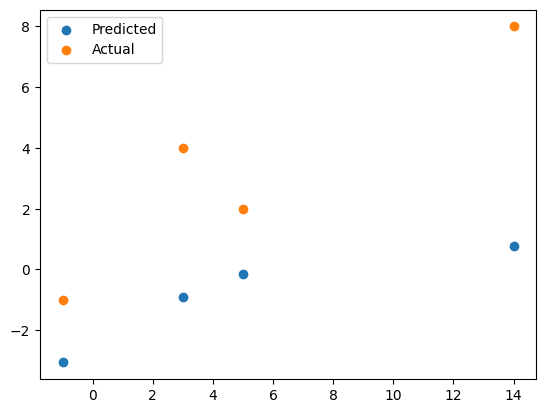

In [125]:
model3 = sm.OLS(Y_train, X_train_scaled).fit()
ypred = model3.predict(X_test_scaled)
#plt.scatter(X, Y)
plt.scatter(X_test, ypred, label='Predicted')
plt.scatter(X_test, Y_test, label='Actual')
plt.legend()

# Univariate Polynomial Regression [Iteration 04]